In [2]:
import os
from PIL import Image
# import webp
# import pyheif

def convert_image_to_rgb_jpeg(folder, out_folder):
    os.makedirs(out_folder, exist_ok=True)

    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)

        # file name with extension
        file_name = os.path.basename(file_path)
        # file name without extension
        file_name_noext = os.path.splitext(file_name)[0]

        # print(file_name)
        # print(file_name_noext)
        # print(out_folder + os.sep + file_name_noext + ".jpg")

        if os.path.isfile(file_path):
            path_name = out_folder + os.sep + file_name_noext + ".jpg"
            if file_name.lower().endswith('.webp'):
                if not os.path.isfile(path_name):
                    # Convert webp to JPEG
                    img = Image.open(file_path)
                    # Convert to RGB mode
                    img_rgb = img.convert('RGB')
                    # Save as JPG
                    img_rgb.save(path_name)
            elif file_name.lower().endswith('.jpeg'):
                if not os.path.isfile(path_name):
                    img = Image.open(file_path)
                    # Convert to RGB mode
                    img_rgb = img.convert('RGB')
                    # Save as JPG
                    img_rgb.save(path_name)
            elif file_name.lower().endswith('.jpg'):
                if not os.path.isfile(path_name):
                    img = Image.open(file_path)
                    # Convert to RGB mode
                    img_rgb = img.convert('RGB')
                    # Save as JPG
                    img_rgb.save(path_name)
            elif file_name.lower().endswith('.png'):
                if not os.path.isfile(path_name):
                    img = Image.open(file_path)
                    # Convert to RGB mode
                    img_rgb = img.convert('RGB')
                    # Save as JPG
                    img_rgb.save(path_name)
        #     elif file_name.lower().endswith('.heic'):
        #         path_name, path_extension = os.path.splitext(file_path)
        #         path_name += ".jpg"
        #         if not os.path.isfile(path_name):
        #             print("Can not convert " + path_name + " on Windows")
        #             print("Converting file " + path_name)
        #             Convert HEIC to JPEG
        #             heic_file = pyheif.read(file_path)
        #             img = Image.frombytes(heic_file.mode, 
        #                                 heic_file.size, 
        #                                 heic_file.data, 
        #                                 "raw", 
        #                                 heic_file.mode, 
        #                                 heic_file.stride,
        #                             )
        #             img.save(path_name, "JPEG")
        
def split_image_into_tiles(image_path, tile_width, tile_height, out_folder):
    """Splits an image into tiles of specified size.

    Args:
        image_path: Path to the image file.
        tile_width: Width of each tile.
        tile_height: Height of each tile.

    Returns:
        List of tile images.
    """

    img = Image.open(image_path)
    width, height = img.size

    # file name with extension
    file_name = os.path.basename(image_path)
    # file name without extension
    file_name_noext = os.path.splitext(file_name)[0]

    tiles = []
    for y in range(0, height, tile_height):
        if y + tile_height > height:
            continue
        for x in range(0, width, tile_width):
            if x + tile_width > width:
                continue
            tile_filename = out_folder + os.sep + file_name_noext + "_" + str(x).rjust(4, '0') + "x" + str(y).rjust(4, '0') + ".jpg"
            tile = img.crop((x, y, x + tile_width, y + tile_height))
            if not os.path.isfile(tile_filename):
                # print(tile_filename)
                tile.save(tile_filename)
            tiles.append(tile)

    return tiles

def convert_image_to_tiles(folder, out_folder, tile_width, tile_height):
    os.makedirs(out_folder, exist_ok=True)

    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)

        # file name with extension
        file_name = os.path.basename(file_path)
        # file name without extension
        file_name_noext = os.path.splitext(file_name)[0]

        # print(file_path)

        if os.path.isfile(file_path):
            split_image_into_tiles(file_path, tile_width, tile_height, out_folder)

def resize_image(folder, out_folder, width, height):
    os.makedirs(out_folder, exist_ok=True)

    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)

        # file name with extension
        file_name = os.path.basename(file_path)
        # file name without extension
        file_name_noext = os.path.splitext(file_name)[0]

        # print(file_path)

        if os.path.isfile(file_path):
            img = Image.open(file_path)
            
            # Resize the image while maintaining aspect ratio
            img.thumbnail((width, height))

            out_filename = out_folder + os.sep + file_name_noext + "_" + str(width).rjust(4, '0') + "x" + str(height).rjust(4, '0') + ".jpg"

            # Save the resized image
            img.save(out_filename)

def crop_center(folder, out_folder, width):
    os.makedirs(out_folder, exist_ok=True)

    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)

        # file name with extension
        file_name = os.path.basename(file_path)
        # file name without extension
        file_name_noext = os.path.splitext(file_name)[0]

        # print(file_path)

        if os.path.isfile(file_path):
            img = Image.open(file_path)

            img_width, img_height = img.size

            if img_width > img_height:
                left = (img_width - img_height) / 2
                resized_image = img.crop((left, 0, left + img_height, img_height))
            else:
                top = (img_height - img_width) / 2
                resized_image = img.crop((0, top, img_width, top + img_width))
                
            img_width, img_height = resized_image.size
            
            if img_width > width:
                # Resize the image while maintaining aspect ratio
                resized_image = resized_image.resize((width, width))

            out_filename = out_folder + os.sep + file_name_noext + "_" + str(width).rjust(4, '0') + "x" + str(width).rjust(4, '0') + ".jpg"

            # Save the resized image
            resized_image.save(out_filename)


In [ ]:
#
# Convert all image to JPEG RGB
convert_image_to_rgb_jpeg("dataset2425/invasive_raw", "dataset2425" + os.sep + "invasive_jpg")
convert_image_to_rgb_jpeg("dataset2425/noninvasive_raw", "dataset2425" + os.sep + "noninvasive_jpg")

#
# Crop image into explicit square size
# tile_width = 1080
tile_width = 256

crop_center("dataset2425" + os.sep + "invasive_jpg",
            "dataset2425" + os.sep + "invasive_" + str(tile_width) + "x" + str(tile_width), tile_width)
crop_center("dataset2425" + os.sep + "noninvasive_jpg",
            "dataset2425" + os.sep + "noninvasive_" + str(tile_width) + "x" + str(tile_width), tile_width)


In [ ]:
import Augmentor

aug_invasive = Augmentor.Pipeline("dataset2425" + os.sep + "invasive_" + str(tile_width) + "x" + str(tile_width))
aug_invasive.rotate(probability=0.2, max_left_rotation=25, max_right_rotation=25)
aug_invasive.rotate90(probability=0.3)
aug_invasive.zoom(probability=0.3, min_factor=1.1, max_factor=1.3)
aug_invasive.flip_left_right(probability=0.4)
aug_invasive.flip_top_bottom(probability=0.3)
aug_invasive.sample(100000)

aug_noninvasive = Augmentor.Pipeline("dataset2425" + os.sep + "noninvasive_" + str(tile_width) + "x" + str(tile_width))
aug_noninvasive.rotate(probability=0.2, max_left_rotation=25, max_right_rotation=25)
aug_noninvasive.rotate90(probability=0.3)
aug_noninvasive.zoom(probability=0.3, min_factor=1.1, max_factor=1.3)
aug_noninvasive.flip_left_right(probability=0.4)
aug_noninvasive.flip_top_bottom(probability=0.3)
aug_noninvasive.sample(100000)


In [2]:
data_set_path = "dataset2425" + os.sep

In [3]:
import os
import pandas as pd
import random

labels_map = {
    0: "noninvasive",
    1: "invasive",
}

# Define the folder containing images
image_folder = data_set_path

# Create column header
column_names = list()
column_names.append("filename")
column_names.append("label")

# List to store image names and label
def create_dataset_csv(image_folder, csv_filename, data_type: int = 0):
    data = []

    for file_name in os.listdir(image_folder):
        file_path = os.path.join(image_folder, file_name)

        # Check if it's an image file (common extensions)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            row = []
            row.append(file_path)
            row.append(data_type)
            data.append(row)

    # Convert the list to a DataFrame
    df = pd.DataFrame(data, columns = column_names)

    # Save the DataFrame to a CSV file
    output_file = data_set_path + csv_filename
    if os.path.isfile(output_file):
        df.to_csv(output_file, mode='a', header=False, index=False)    
    else:
        df.to_csv(output_file, index=False)

    print(f"CSV file saved as {output_file}")

#
# Spilt into train and test data set
def split_csv_randomly(input_file, split_percentage):
    """Splits a large CSV file randomly into smaller chunks."""

    # Get the parent directory of the file
    parent_dir = os.path.dirname(input_file)

    # file name with extension
    file_name = os.path.basename(input_file)
    # file name without extension
    file_name_noext = os.path.splitext(file_name)[0]

    df = pd.read_csv(input_file)
    df = df.sample(frac=1).reset_index(drop=True)  # Shuffle rows randomly
    
    chunk_size = int(len(df) * split_percentage)
    
    print("Total train: " + str(chunk_size))
    print("Total test: " + str(len(df) - chunk_size))

    chunk = df[0:chunk_size]
    out_filename = parent_dir + os.sep + file_name_noext + "_" + "train" + ".csv"
    if os.path.isfile(out_filename):
        chunk.to_csv(out_filename, mode='a', header=False, index=False)    
    else:
        chunk.to_csv(out_filename, index=False)

    chunk = df[chunk_size:]
    out_filename = parent_dir + os.sep + file_name_noext + "_" + "test" + ".csv"
    if os.path.isfile(out_filename):
        chunk.to_csv(out_filename, mode='a', header=False, index=False)    
    else:
        chunk.to_csv(out_filename, index=False)

def combine_csv(folder, csv_files, out_filename, rad = True):
    all_files = []
    
    # append all files together
    for file in csv_files:
        file_path = os.path.join(folder, file)
        all_files.append(file_path)

    df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    
    if rad:
        df = df.sample(frac=1) # Shuffle rows randomly
    
    output_file = os.path.join(folder, out_filename)
    df.to_csv(output_file, index=False)


In [ ]:
#
# Create invasive/non-invasive data set

# extra_folder = "output"
# create_dataset_csv(data_set_path + "invasive_" + str(tile_width) + "x" + str(tile_width) + os.sep + extra_folder, "dataset_invasive.csv", 1)
# create_dataset_csv(data_set_path + "noninvasive_" + str(tile_width) + "x" + str(tile_width) + os.sep + extra_folder, "dataset_noninvasive.csv", 0)
# split_csv_randomly(data_set_path + "dataset_invasive.csv", 0.8)
# split_csv_randomly(data_set_path + "dataset_noninvasive.csv", 0.8)

# combine_csv(data_set_path, [ "dataset_invasive_train.csv", "dataset_noninvasive_train.csv" ], "dataset_train.csv")
# combine_csv(data_set_path, [ "dataset_invasive_test.csv", "dataset_noninvasive_test.csv" ], "dataset_test.csv")


````
Re-train From Here
````

In [4]:
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import pandas as pd
from torch.utils.data import DataLoader
from torchvision.io import read_image

batch_size = 64
num_classes = 2
learning_rate = 0.001
# image_model_size = 32
image_model_size = 256
# image_model_size = 1080

if torch.cuda.is_available():
    print("Enable Cuda")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class NoneTransform(object):
    ''' Does nothing to the image. To be used instead of None '''
    
    def __call__(self, image):       
        return image

class CustomImageDataset(DataLoader):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.ToPILImage(),
                                    transforms.Resize((image_model_size, image_model_size)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                        std=[0.2023, 0.1994, 0.2010])
                                    ])


Enable Cuda


In [5]:
# Load data
train_data = CustomImageDataset("data" + os.sep + "dataset_train.csv", "", all_transforms)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = CustomImageDataset("data" + os.sep + "dataset_test.csv", "", all_transforms)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [6]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        #
        # Layer 1:
        #   Output size = (input size - Kernel size + 1)
        model_output_size = image_model_size - 3 + 1
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        #
        # Layer 2:
        model_output_size = model_output_size - 3 + 1
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        
        #
        # Max Pool1:
        #  Output size = (Input size / Stride)
        model_output_size = model_output_size / 2
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        #
        # Layer 3:
        model_output_size = model_output_size - 3 + 1
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        #
        # Layer 4:
        model_output_size = model_output_size - 3 + 1
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        #
        # Max Pool2:
        model_output_size = model_output_size / 2        
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        # Flattened size = model_output_size * model_output_size * 64
        # self.fc1 = nn.Linear(1600, 128) # for 32x32 image input size
        # self.fc1 = nn.Linear(10816, 128) # for 64x64 image input size
        # self.fc1 = nn.Linear(238144, 128) # for 256x256 image input size
        self.fc1 = nn.Linear(int(model_output_size * model_output_size * 64), 128)

        # self.relu1 = nn.ReLU()
        self.relu1 = nn.Sigmoid()

        self.fc2 = nn.Linear(128, num_classes)

    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)

        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = ConvNeuralNet(num_classes)
if torch.cuda.is_available():
    model.cuda()

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss() #CHANGE THIS TO BINARY CROSS ENTROPY LOSS 
# criterion = nn.BCELoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_dataloader)
print("Total step: " + str(total_step))
print("Stripe: " + str(batch_size))

Total step: 2500
Stripe: 64


In [8]:
from datetime import datetime

#num_epochs = 10
num_epochs = 1

print("Training with CNN...")
count = 0
ts = datetime.now()
print_stride = 1000
next_print = print_stride
dot_cnt = 0

# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
    print("Computing Epoch " + str(epoch) + "...")
    # Load in the data in batches using the train_dataloader object
    for i, (images, labels) in enumerate(train_dataloader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        count += len(labels)
        if count >= next_print:
            next_print += print_stride
            print(".", end="")
            dot_cnt += 1
            if dot_cnt >= 20:
                dot_cnt = 0
                elapsed = datetime.now() - ts
                print(f"{elapsed}")
                print(str(count).rjust(10), end="")

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

delta = datetime.now() - ts
print("")
print("Time: " + str(delta.seconds) + "." + str(delta.microseconds) + " seconds", flush=True)
print("Model trained with " + str(count))


Training with CNN...
Computing Epoch 0...
....................0:00:16.893199
     20032....................0:00:32.939766
     40000....................0:00:49.025380
     60032....................0:01:05.324339
     80000....................0:01:21.572829
    100032....................0:01:37.563605
    120000....................0:01:53.477894
    140032....................0:02:09.380165
    160000Epoch [1/1], Loss: 0.0505

Time: 129.404319 seconds
Model trained with 160000


In [8]:
# Save the model
torch.save(model, "asdrp_cnn_model.pth")

In [ ]:
# Load the model
loaded_model = torch.load("asdrp_cnn_model.pth")

In [9]:
target_layer = model.conv_layer4

In [10]:
import cv2

# Function to generate Grad-CAM heatmap
def generate_gradcam(model, target_layer, input_tensor, class_idx):
    activations = None
    gradients = None

    # Hook functions to capture activations and gradients
    def forward_hook(module, input, output):
        nonlocal activations
        activations = output

    def backward_hook(module, grad_input, grad_output):
        nonlocal gradients
        gradients = grad_output[0]

    # Register hooks
    forward_handle = target_layer.register_forward_hook(forward_hook)
    backward_handle = target_layer.register_backward_hook(backward_hook)
    # backward_handle = target_layer.register_full_backward_hook(backward_hook)

    # Forward pass
    output = model(input_tensor)
    model.zero_grad()

    # Get the score for the target class
    score = output[:, class_idx]
    
    # Backpropagate to get gradients
    score.backward()

    # Remove hooks
    # forward_handle.remove()
    backward_handle.remove()

    # Compute weights for Grad-CAM
    weights = torch.mean(gradients, dim=[2, 3], keepdim=True)
    cam = torch.sum(weights * activations, dim=1).squeeze()
    cam = torch.relu(cam)  # Keep only positive contributions

    # Normalize heatmap
    cam = cam - cam.min()
    cam = cam / cam.max()
    return cam.cpu().detach().numpy()


# Function to overlay heatmap on image
def overlay_heatmap(img, heatmap):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    return overlay

C:\Users\Chloe\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
C:\Users\Chloe\AppData\Local\Temp\ipykernel_9988\62149399.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img = cv2.imread(row[0])


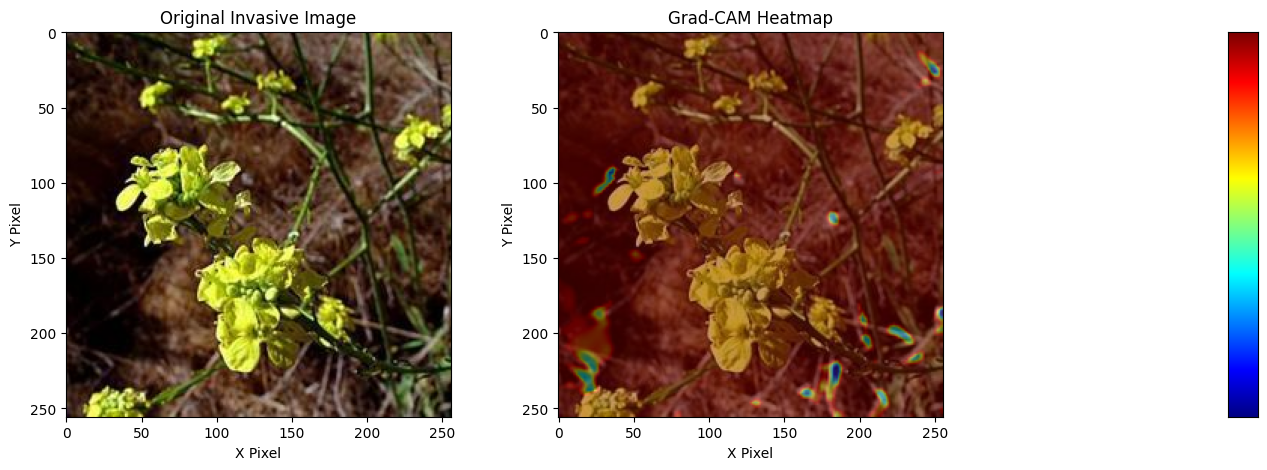

In [29]:
import pandas as pd
import numpy as np

csv_path = "data" + os.sep + "dataset_test_one_invasive.csv"
test_data_one = CustomImageDataset(csv_path, "", all_transforms)
test_dataloader_one = DataLoader(test_data_one, batch_size=1, shuffle=False)

# Example usage:
for images, labels in test_dataloader_one:
        images = images.to(device)
        labels = labels.to(device)
        heatmap = generate_gradcam(model, target_layer, images, class_idx=1)  # Change class_idx if needed
        break

data_csv = pd.read_csv(csv_path)
for index, row in data_csv.iterrows():
        img = cv2.imread(row[0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        break

import matplotlib.pyplot as plt

# Overlay heatmap on image
heatmap_img = overlay_heatmap(img, heatmap)

# Display the result
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.title("Original Invasive Image")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.title("Grad-CAM Heatmap")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.imshow(heatmap_img)

height, width = 256, 20
grayscale_image = np.zeros((height, width), dtype=np.uint8)
for i in reversed(range(height)):
    grayscale_image[i, :] = int(255 * (i / height)) # Create a vertical gradient
jet_colormap_image = cv2.applyColorMap(grayscale_image, cv2.COLORMAP_JET)
sp = plt.subplot(1, 3, 3)
sp.xaxis.set_visible(False)
sp.yaxis.set_visible(False)
plt.imshow(jet_colormap_image)

plt.show()

In [ ]:
import pandas as pd

csv_path = "data" + os.sep + "dataset_test_one_noninvasive.csv"
test_data_one = CustomImageDataset(csv_path, "", all_transforms)
test_dataloader_one = DataLoader(test_data_one, batch_size=1, shuffle=False)

# Example usage:
for images, labels in test_dataloader_one:
        images = images.to(device)
        labels = labels.to(device)
        heatmap = generate_gradcam(model, target_layer, images, class_idx=1)  # Change class_idx if needed
        break

data_csv = pd.read_csv(csv_path)
for index, row in data_csv.iterrows():
        img = cv2.imread(row[0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        break

import matplotlib.pyplot as plt

# Overlay heatmap on image
heatmap_img = overlay_heatmap(img, heatmap)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Non-Invasive Image")

plt.subplot(1, 2, 2)
plt.imshow(heatmap_img)
plt.title("Grad-CAM Heatmap")

plt.show()

In [5]:
correct = 0
total = 0
targets = []
preds = []
with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        targets = targets + labels[:].tolist()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        preds = preds + predicted[:].tolist()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {:,} train images: {:0.3f} %'.format(total_step * batch_size, 100 * correct / total))


Accuracy of the network on the 160,000 train images: 99.388 %


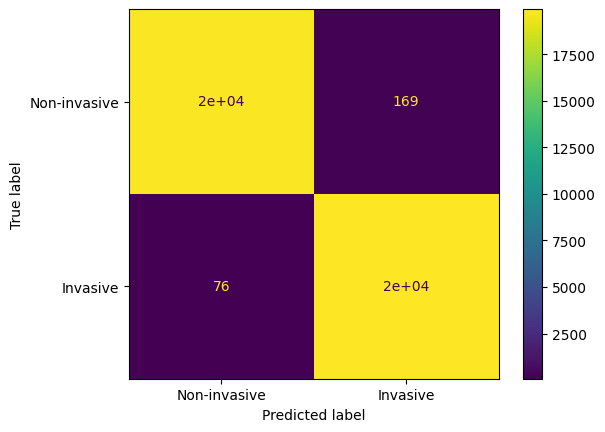

Accuracy: 0.993875 
F1 score: 0.9938892075923478
Recall: 0.9962
Precision: 0.9915891106355447


In [6]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = targets
predicted = preds

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-invasive", "Invasive"])

cm_display.plot()
plt.show()

print('Accuracy: {} '.format(metrics.accuracy_score(actual, predicted)))
print('F1 score: {}'.format(metrics.f1_score(actual, predicted)))
print('Recall: {}'.format(metrics.recall_score(actual, predicted)))
print('Precision: {}'.format(metrics.precision_score(actual, predicted)))

````
Training with CNN...
Computing Epoch 0...
....................0:00:48.152505
     20032....................0:01:35.948662
     40000....................0:02:23.894845
     60032....................0:03:11.682721
     80000....................0:03:59.641251
    100032....................0:04:47.457186
    120000....................0:05:35.441786
    140032....................0:06:23.241686
    160000Epoch [1/10], Loss: 0.0937
Computing Epoch 1...
....................0:07:11.250235
    180032....................0:07:59.053827
    200000....................0:08:47.024380
    220032....................0:09:34.844332
    240000....................0:10:22.752093
    260032....................0:11:10.377844
    280000....................0:11:58.135952
    300032....................0:12:45.713751
    320000Epoch [2/10], Loss: 0.0180
Computing Epoch 2...
....................0:13:33.540444
    340032....................0:14:21.122699
    360000....................0:15:08.874910
    380032....................0:15:56.472222
    400000....................0:16:44.209084
    420032....................0:17:31.837622
    440000....................0:18:19.575586
    460032....................0:19:07.152949
    480000Epoch [3/10], Loss: 0.0440
Computing Epoch 3...
....................0:19:54.955092
    500032....................0:20:42.541239
    520000....................0:21:30.297201
    540032....................0:22:17.873281
    560000....................0:23:05.639389
    580032....................0:23:53.239640
    600000....................0:24:40.975127
    620032....................0:25:28.581881
    640000Epoch [4/10], Loss: 0.1065
Computing Epoch 4...
....................0:26:16.384081
    660032....................0:27:03.982750
    680000....................0:27:51.736291
    700032....................0:28:39.317001
    720000....................0:29:27.100672
    740032....................0:30:14.682572
    760000....................0:31:02.431812
    780032....................0:31:50.019426
    800000Epoch [5/10], Loss: 0.0071
Computing Epoch 5...
....................0:32:37.820904
    820032....................0:33:25.404363
    840000....................0:34:13.140058
    860032....................0:35:00.750937
    880000....................0:35:48.511481
    900032....................0:36:36.093076
    920000....................0:37:23.832740
    940032....................0:38:11.409716
    960000Epoch [6/10], Loss: 0.0761
Computing Epoch 6...
....................0:38:59.224330
    980032....................0:39:46.832338
   1000000....................0:40:34.568829
   1020032....................0:41:22.206222
   1040000....................0:42:09.952961
   1060032....................0:42:57.548121
   1080000....................0:43:45.303536
   1100032....................0:44:32.883077
   1120000Epoch [7/10], Loss: 0.0124
Computing Epoch 7...
....................0:45:20.706608
   1140032....................0:46:08.303965
   1160000....................0:46:56.073342
   1180032....................0:47:43.703414
   1200000....................0:48:31.436508
   1220032....................0:49:19.030059
   1240000....................0:50:06.770826
   1260032....................0:50:54.376170
   1280000Epoch [8/10], Loss: 0.0246
Computing Epoch 8...
....................0:51:42.188177
   1300032....................0:52:29.777463
   1320000....................0:53:17.577939
   1340032....................0:54:05.174040
   1360000....................0:54:52.921839
   1380032....................0:55:40.521054
   1400000....................0:56:28.276369
   1420032....................0:57:15.892107
   1440000Epoch [9/10], Loss: 0.0181
Computing Epoch 9...
....................0:58:03.701874
   1460032....................0:58:51.328058
   1480000....................0:59:39.129233
   1500032....................1:00:26.726599
   1520000....................1:16:19.971134
   1540032....................1:17:07.658990
   1560000....................1:17:55.683763
   1580032....................1:18:43.471965
   1600000Epoch [10/10], Loss: 0.0171

Time: 4723.621963 seconds
Model trained with 1600000

Accuracy of the network on the 160,000 train images: 99.430 %

Accuracy: 0.9943 
F1 score: 0.9943170488534396
Recall: 0.9973
Precision: 0.9913518886679921

````

````
Run #1:
Accuracy: 0.993625 
F1 score: 0.9936515049667638
Recall: 0.9978
Precision: 0.989537363018793

Run #2:
Accuracy: 0.993325 
F1 score: 0.9933507657825924
Recall: 0.9972
Precision: 0.9895311337137187

Run #3:
Accuracy: 0.994175 
F1 score: 0.994191698865761
Recall: 0.99705
Precision: 0.9913497390007457

Run #4:
Accuracy: 0.992775 
F1 score: 0.9928104087369705
Recall: 0.9977
Precision: 0.9879685101747784

Run #5:
Accuracy: 0.993875 
F1 score: 0.9938892075923478
Recall: 0.9962
Precision: 0.9915891106355447

````